# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [38]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")

In [40]:
print(api_key)

8808aff566e144608d66b2df8f4885ca


In [41]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [42]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
)

In [43]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Eth_news = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
)

In [44]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_scores = []
for article in bitcoin_news['articles']:
    try:
        text =article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_scores.append({'text': text, 'date': date, 'compound': compound, 'positive': pos, 'neutral': neu, 'negative': neg})
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_scores)
btc_df.head()

,text,date,compound,positive,neutral,negative
0,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07T08:58:53Z,0.1779,0.052,0.948,0.000
1,Magnum Real Estate is set to accept bitcoin as...,2021-09-19T14:37:34Z,0.6597,0.157,0.843,0.000
2,"Editor's Note: With so much market volatility,...",2021-09-24T10:14:00Z,0.3365,0.064,0.936,0.000
3,The U.S. Securities and Exchange Commission (S...,2021-09-10T09:54:32Z,0.0772,0.063,0.883,0.054
4,"Last May, the Chinese governmentbanned the cou...",2021-09-24T15:14:00Z,0.0000,0.000,1.000,0.000


In [45]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_scores = []
for article in Eth_news['articles']:
    try:
        text =article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_scores.append({'text': text, 'date': date, 'compound': compound, 'positive': pos, 'neutral': neu, 'negative': neg})
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(btc_scores)
eth_df.head()

,text,date,compound,positive,neutral,negative
0,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07T08:58:53Z,0.1779,0.052,0.948,0.000
1,Magnum Real Estate is set to accept bitcoin as...,2021-09-19T14:37:34Z,0.6597,0.157,0.843,0.000
2,"Editor's Note: With so much market volatility,...",2021-09-24T10:14:00Z,0.3365,0.064,0.936,0.000
3,The U.S. Securities and Exchange Commission (S...,2021-09-10T09:54:32Z,0.0772,0.063,0.883,0.054
4,"Last May, the Chinese governmentbanned the cou...",2021-09-24T15:14:00Z,0.0000,0.000,1.000,0.000


In [46]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.00000
mean,0.068645,0.047350,0.918400,0.03425
std,0.346975,0.050295,0.071754,0.05941
min,-0.860800,0.000000,0.770000,0.00000
25%,0.000000,0.000000,0.876750,0.00000
50%,0.000000,0.054500,0.930000,0.00000
75%,0.284450,0.076750,1.000000,0.05700
max,0.659700,0.157000,1.000000,0.23000


In [47]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,neutral,negative
count,40.000000,40.00000,40.000000,40.000000
mean,0.128700,0.06570,0.897925,0.036400
std,0.380654,0.06428,0.083948,0.058156
min,-0.860800,0.00000,0.731000,0.000000
25%,0.000000,0.00000,0.837750,0.000000
50%,0.077200,0.06150,0.903500,0.000000
75%,0.401900,0.11025,0.970750,0.059500
max,0.826800,0.21800,1.000000,0.230000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [49]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [50]:
# Instantiate the lemmatizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Create a list of stopwords
stopwords_list = stopwords.words('english')

# Expand the default stopwords list if necessary
sw_add_ons = {'', 'chars', 'char', 'reuters',"bitcoin","ethereum","crypto","article", "cryptocurrency"}

In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(text)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [52]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokens = [tokenizer(headline) for headline in btc_df['text']]
btc_df['Tokens'] = btc_tokens
btc_df.head()

,text,date,compound,positive,neutral,negative,Tokens
0,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07T08:58:53Z,0.1779,0.052,0.948,0.000,"[recentlyinstalled, atm, today, official, curr..."
1,Magnum Real Estate is set to accept bitcoin as...,2021-09-19T14:37:34Z,0.6597,0.157,0.843,0.000,"[magnum, real, estate, set, accept, payment, t..."
2,"Editor's Note: With so much market volatility,...",2021-09-24T10:14:00Z,0.3365,0.064,0.936,0.000,"[editor, note, much, market, volatility, stay,..."
3,The U.S. Securities and Exchange Commission (S...,2021-09-10T09:54:32Z,0.0772,0.063,0.883,0.054,"[u, security, exchange, commission, sec, conti..."
4,"Last May, the Chinese governmentbanned the cou...",2021-09-24T15:14:00Z,0.0000,0.000,1.000,0.000,"[last, may, chinese, governmentbanned, country..."


In [53]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokens = [tokenizer(headline) for headline in eth_df['text']]
eth_df['Tokens'] = eth_tokens
eth_df.head()

,text,date,compound,positive,neutral,negative,Tokens
0,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07T08:58:53Z,0.1779,0.052,0.948,0.000,"[recentlyinstalled, atm, today, official, curr..."
1,Magnum Real Estate is set to accept bitcoin as...,2021-09-19T14:37:34Z,0.6597,0.157,0.843,0.000,"[magnum, real, estate, set, accept, payment, t..."
2,"Editor's Note: With so much market volatility,...",2021-09-24T10:14:00Z,0.3365,0.064,0.936,0.000,"[editor, note, much, market, volatility, stay,..."
3,The U.S. Securities and Exchange Commission (S...,2021-09-10T09:54:32Z,0.0772,0.063,0.883,0.054,"[u, security, exchange, commission, sec, conti..."
4,"Last May, the Chinese governmentbanned the cou...",2021-09-24T15:14:00Z,0.0000,0.000,1.000,0.000,"[last, may, chinese, governmentbanned, country..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [56]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def join_df_column_to_string(dataframe_column):
    '''Joins dataframe column of strings and returns one big string.'''
    new_big_string = [' '.join(item) for item in dataframe_column]
    return new_big_string
def get_bigrams(big_string):
    # Run tokenizer to clean data
    processed = tokenizer(str(big_string))

    # Create bigrams list
    bigrams = ngrams(processed, n=2)

    # Return bigrams
    return bigrams
btc_string = join_df_column_to_string(btc_df['Tokens'])

btc_bigrams = get_bigrams(btc_string)

btc_frequency = Counter(btc_bigrams).most_common(20)
btc_frequency

[(('august', 'august'), 4),
 (('el', 'salvador'), 3),
 (('alongside', 'u'), 2),
 (('u', 'dollar'), 2),
 (('american', 'country'), 2),
 (('magnum', 'real'), 2),
 (('real', 'estate'), 2),
 (('page', 'techmeme'), 2),
 (('techmeme', 'archive'), 2),
 (('archive', 'page'), 2),
 (('page', 'show'), 2),
 (('show', 'site'), 2),
 (('site', 'appeared'), 2),
 (('appeared', 'et'), 2),
 (('et', 'september'), 2),
 (('september', 'current'), 2),
 (('current', 'version'), 2),
 (('version', 'site'), 2),
 (('site', 'always'), 2),
 (('always', 'available'), 2)]

In [57]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_string = join_df_column_to_string(eth_df['Tokens'])

eth_bigrams = get_bigrams(eth_string)

eth_frequency = Counter(eth_bigrams).most_common(20)
eth_frequency

[(('august', 'august'), 5),
 (('el', 'salvador'), 3),
 (('vitalik', 'buterin'), 3),
 (('alongside', 'u'), 2),
 (('u', 'dollar'), 2),
 (('american', 'country'), 2),
 (('magnum', 'real'), 2),
 (('real', 'estate'), 2),
 (('elon', 'musk'), 2),
 (('btc', 'eth'), 2),
 (('eth', 'ether'), 2),
 (('ether', 'token'), 2),
 (('token', 'dogecoin'), 2),
 (('dogecoin', 'doge'), 2),
 (('doge', 'roughly'), 2),
 (('roughly', 'respectively'), 2),
 (('respectively', 'pm'), 2),
 (('pm', 'edt'), 2),
 (('edt', 'wednesday'), 2),
 (('wednesday', 'top'), 2)]

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_string = ' '.join(btc_df['text'])
btc_words_tokened = tokenizer(btc_string)
btc_word_count = token_count(btc_words_tokened)
btc_word_count

[('btc', 7), ('august', 7), ('page', 6)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_string = ' '.join(eth_df['text'])
eth_words_tokened = tokenizer(eth_string)
eth_word_count = token_count(eth_words_tokened)
eth_word_count

[('august', 10), ('btc', 8), ('nft', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

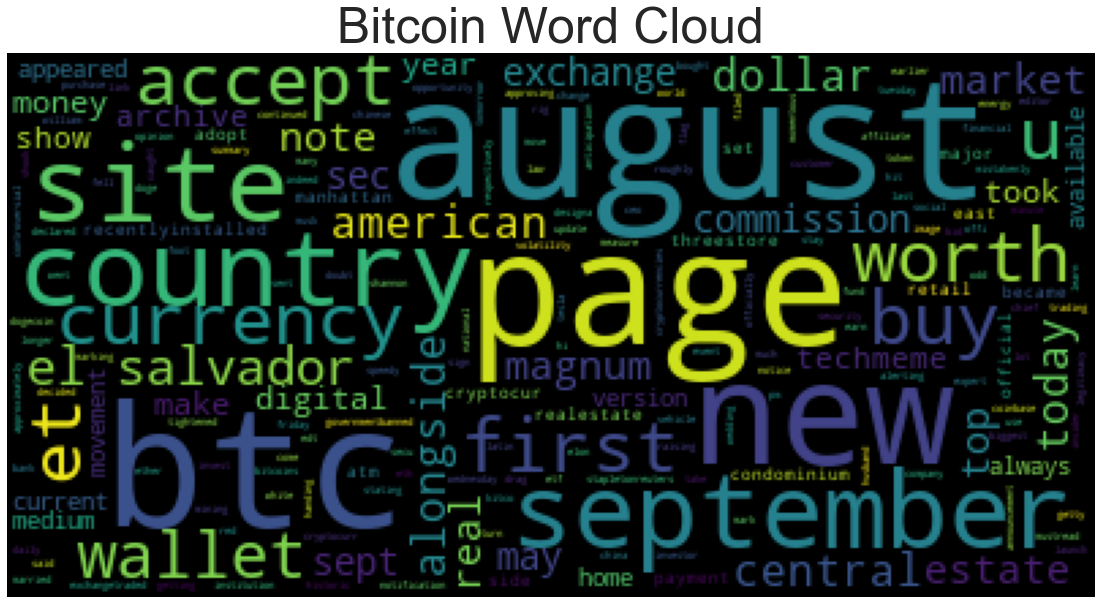

In [64]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_words_joined = ' '.join(btc_words_tokened)
wc = WordCloud().generate(btc_words_joined)
plt.imshow(wc)
plt.title('Bitcoin Word Cloud',
    fontdict={'size': 50},
    loc='Center'
)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

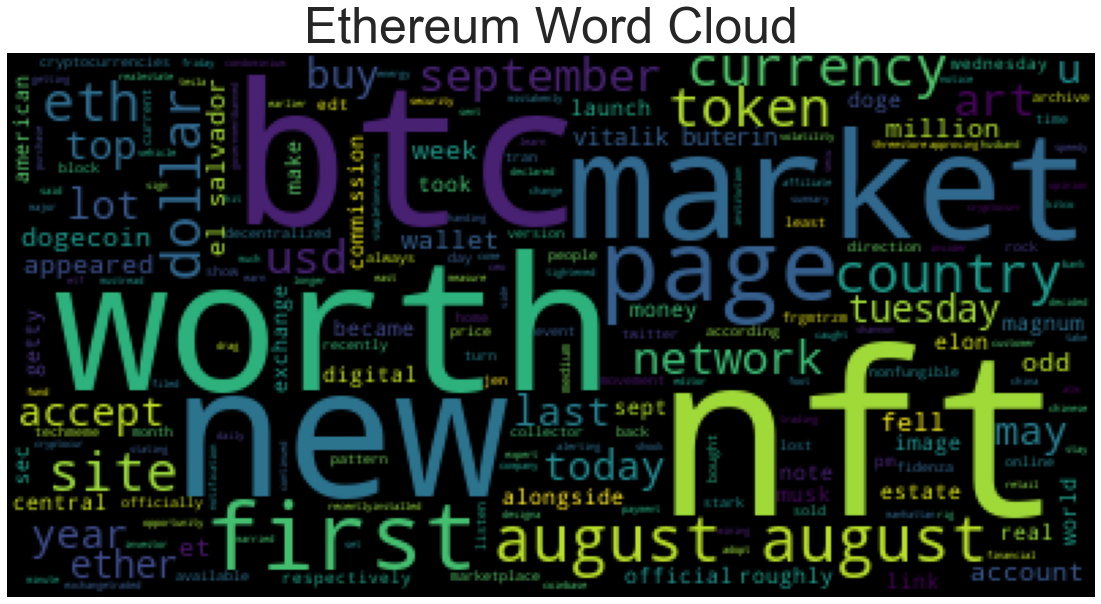

In [65]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_words_joined = ' '.join(eth_words_tokened)
wc = WordCloud().generate(eth_words_joined)
plt.imshow(wc)
plt.title('Ethereum Word Cloud',
    fontdict={'size': 50},
    loc='Center'
)
plt.axis('off')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [71]:
import spacy
from spacy import displacy

In [72]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [73]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [74]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_string

'A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars] Magnum Real Estate is set to accept bitcoin as payment for a three-store retail condominium in Manhattans East Side.\r\nMajor real-estate opportunity for bitcoin investors\r\nMagnum Real Estate is accept… [+1762 chars] Editor\'s Note: With so much market volatility, stay on top of daily news! Get caught up in minutes with our speedy summary of today\'s must-read news and expert opinions. Sign up here! \r\n(Kitco News) … [+1167 chars] The U.S. Securities and Exchange Commission (SEC) has continued to drag its feet over approving a bitcoin exchange-traded fund (ETF).\r\nThe SEC filed a notice on Sept 8 stating that it has now designa… [+2392 chars] Last May, the Chinese governmentbanned the country\'s financial institutions from trading digital currencies . This Friday, 

In [75]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_string)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data['title'] = 'Bitcoin NER'

In [76]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [78]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

Bitcoin ATM PERSON
today DATE
Bitcoin PERSON
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
three CARDINAL
Manhattans NORP
Magnum Real Estate PERSON
daily DATE
today DATE
Kitco News ORG
The U.S. Securities and Exchange Commission ORG
SEC ORG
SEC ORG
Last May DATE
Chinese NORP
This Friday DATE
the Central Bank of China ORG
Reuters ORG
100 MONEY
Elon Musk PERSON
Bitcoin PERSON
Learn ORG
earlier this year DATE
1,000 MONEY
El Salvador's GPE
Bitcoin Law WORK_OF_ART
Tuesday DATE
Latin American NORP
first ORDINAL
Ethereum's ORG
ETH ORG
Dogecoin GPE
roughly 3.1%, 6% PERCENT
3.8% PERCENT
4:15 p.m. EDT TIME
Wednesday DATE
El Salvador GPE
Bitcoin PERSON
tomorrow DATE
U.S GPE
400 CARDINAL
Bitcoins PERSON
Techmeme PERSON
4:20 AM ET TIME
September DATE
2021 DATE
William White PERSON
Mark PERSON
at least 3 inches QUANTITY
New Jersey GPE
Hurricane Ida EVENT
first ORDINAL
Bitcoin(CRYPTO ORG
BTC ORG
Techmeme PERSON
9:40 AM ET TIME
September DATE
2021 DATE
a fourth day DATE
Salvadoran NORP
fo

---

### Ethereum NER

In [79]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_string

'A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars] Magnum Real Estate is set to accept bitcoin as payment for a three-store retail condominium in Manhattans East Side.\r\nMajor real-estate opportunity for bitcoin investors\r\nMagnum Real Estate is accept… [+1762 chars] Editor\'s Note: With so much market volatility, stay on top of daily news! Get caught up in minutes with our speedy summary of today\'s must-read news and expert opinions. Sign up here! \r\n(Kitco News) … [+1167 chars] The U.S. Securities and Exchange Commission (SEC) has continued to drag its feet over approving a bitcoin exchange-traded fund (ETF).\r\nThe SEC filed a notice on Sept 8 stating that it has now designa… [+2392 chars] Last May, the Chinese governmentbanned the country\'s financial institutions from trading digital currencies . This Friday, 

In [80]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_string)

# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data['title'] = 'Ethereum NER'

In [81]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent')

In [82]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

Bitcoin ATM PERSON
today DATE
Bitcoin PERSON
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
three CARDINAL
Manhattans NORP
Magnum Real Estate PERSON
daily DATE
today DATE
Kitco News ORG
The U.S. Securities and Exchange Commission ORG
SEC ORG
SEC ORG
Last May DATE
Chinese NORP
This Friday DATE
the Central Bank of China ORG
Reuters ORG
100 MONEY
Elon Musk PERSON
Bitcoin PERSON
Learn ORG
earlier this year DATE
1,000 MONEY
El Salvador's GPE
Bitcoin Law WORK_OF_ART
Tuesday DATE
Latin American NORP
first ORDINAL
Ethereum's ORG
ETH ORG
Dogecoin GPE
roughly 3.1%, 6% PERCENT
3.8% PERCENT
4:15 p.m. EDT TIME
Wednesday DATE
El Salvador GPE
Bitcoin PERSON
tomorrow DATE
U.S GPE
400 CARDINAL
Bitcoins PERSON
Techmeme PERSON
4:20 AM ET TIME
September DATE
2021 DATE
William White PERSON
Mark PERSON
at least 3 inches QUANTITY
New Jersey GPE
Hurricane Ida EVENT
first ORDINAL
Bitcoin(CRYPTO ORG
BTC ORG
Techmeme PERSON
9:40 AM ET TIME
September DATE
2021 DATE
a fourth day DATE
Salvadoran NORP
fo

---